# Project Overview: Analyzing Historical Gold Prices 📈💰

## Problem Statement 🎯
This project aims to analyze a comprehensive dataset of daily gold prices spanning from January 19, 2014, to January 22, 2024, obtained from Nasdaq. The dataset includes key financial metrics for each trading day, such as opening and closing prices, trading volume, and the highest and lowest prices recorded during the day.

## Dataset Description 📊
1. **Date**: A unique identifier for each trading day.
2. **Close**: Closing price of gold on the respective date.
3. **Volume**: Gold trading volume on the corresponding date.
4. **Open**: Opening price of gold on the respective date.
5. **High**: The highest recorded price of gold during the trading day.
6. **Low**: The lowest price recorded for gold in the trading day.

## Project Objectives 🌟
1. **Time Series Analysis**:
   - Explore historical trends and patterns in gold prices 📉.
   - Identify seasonality, cyclicality, and long-term trends in the gold market 📊.
   
2. **Advanced Modeling**:
   - Develop predictive models to forecast future gold prices based on historical data 📈.
   - Evaluate and compare the performance of different forecasting algorithms 📊.
   
3. **Trading Strategy Development**:
   - Formulate and backtest trading strategies based on price and volume information 💼.
   - Explore the feasibility of reverse trading strategies for profit maximization 💰.
   
4. **Market Sentiment Analysis**:
   - Investigate the impact of market events on gold prices 🌐.
   - Assess market sentiment and its influence on short-term and long-term price movements 📈.
   
5. **Statistical Analysis**:
   - Conduct statistical tests and analyses to gain insights into the characteristics of gold price movements 📊.
   - Explore correlations with external factors and macroeconomic indicators 🌍.

## Considerations ⚠️
- Users are advised to validate the accuracy and reliability of the information 🧐.
- Be aware of limitations and biases inherent in financial databases 📉.
- Acknowledge the potential impact of external events on gold prices 🌍.

## Expected Deliverables 📦
- Time series visualizations illustrating trends and patterns 📈.
- Predictive models for future gold price forecasting 📊.
- Back-tested trading strategies with performance metrics 💼.
- Market sentiment analysis reports highlighting key events and their impact 🌐.
- Statistical analyses providing insights into the characteristics of gold price movements 📊.

This project caters to researchers, analysts, and data enthusiasts interested in understanding historical gold price trends and patterns. It aims to enable informed decision-making, develop effective trading strategies, and contribute to a deeper understanding of market behavior 🌟.


In [1]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
import plotly.express as px
import warnings as w
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
w.filterwarnings('ignore')



# Gold Price Analysis 📈📊

## Data Loading and Initial Exploration

### Loading Data
- Imported necessary libraries including Pandas, NumPy, Statsmodels, Plotly, and Prophet.
- Loaded the dataset `goldstock.csv` containing daily gold prices from Nasdaq.
- Removed the 'Unnamed: 0' column which seemed to be an index or redundant.

### Dataset Overview
- Checked the first 5 rows using `df.head(5)` to get an initial view of the data.
- Conducted descriptive statistics using `df.describe()` to summarize numerical features.
- Explored the shape of the dataset with `df.shape` to understand the dimensions (rows and columns).
- Reviewed data types and missing values using `df.info()` to ensure data quality.

### Next Steps
- Perform time series analysis to explore trends, seasonality, and patterns in gold prices.
- Utilize statistical tools such as ADF test, ACF, and PACF plots to assess stationarity and autocorrelation.
- Develop forecasting models (e.g., ARIMA, SARIMAX, Prophet) to predict future gold prices.
- Visualize insights using Plotly for interactive and informative plots.


In [2]:
df=pd.read_csv('/kaggle/input/goldprice/goldstock.csv')

In [3]:
df.head(5)

Unnamed: 0        Date   Close    Volume    Open    High     Low
0           0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1           1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2           2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3           3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4           4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1

In [4]:
df.tail(5)

Unnamed: 0        Date   Close   Volume    Open    High     Low
2506        2528  2014-01-28  1250.5  81426.0  1254.9  1261.9  1248.0
2507        2529  2014-01-27  1263.5  63419.0  1269.9  1280.1  1252.0
2508        2530  2014-01-24  1264.5  34998.0  1264.3  1273.2  1256.9
2509        2531  2014-01-23  1262.5  41697.0  1235.1  1267.1  1230.8
2510        2532  2014-01-22  1238.6  80262.0  1240.5  1243.5  1235.5

In [5]:
df.sample(5)

Unnamed: 0        Date   Close    Volume    Open    High     Low
608          611  2021-08-13  1778.2  140689.0  1754.4  1781.9  1753.0
399          402  2022-06-13  1831.8  243512.0  1879.0  1882.5  1819.0
2240        2252  2015-02-18  1200.2  114178.0  1209.3  1213.4  1197.2
1804        1810  2016-11-08  1274.5  194922.0  1282.2  1291.5  1273.3
242          242  2023-02-01  1942.8  205037.0  1944.0  1970.8  1936.1

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.describe()

Close         Volume         Open         High          Low
count  2511.000000    2511.000000  2511.000000  2511.000000  2511.000000
mean   1498.726085  185970.770609  1498.725528  1508.451454  1488.869932
std     298.824811   97600.769382   299.118187   301.262244   296.417703
min    1049.600000       1.000000  1051.500000  1062.700000  1045.400000
25%    1249.850000  126693.500000  1249.500000  1257.300000  1242.350000
50%    1332.800000  175421.000000  1334.000000  1342.400000  1326.600000
75%    1805.850000  234832.000000  1805.600000  1815.450000  1793.050000
max    2093.100000  787217.000000  2094.400000  2098.200000  2074.600000

In [8]:
df.shape

(2511, 6)

In [9]:
df.columns

Index(['Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


## Visualizing Gold Prices

### Opening Stock Prices of Gold

#### Data Preparation
- 📅 Set the 'Date' column as the index of the DataFrame (`df.set_index('Date', inplace=True)`).
- 🕰️ Converted the 'Date' column to datetime format (`df['Date'] = pd.to_datetime(df['Date'])`).

#### Entire Time Period
- 📈 Visualized the closing prices of gold over the entire dataset period using Plotly Express.
- 🎨 Adjusted layout settings for a visually appealing plot with a black background and yellow text.

#### Subset from 2019 to 2024
- 📉 Focused on the opening prices of gold from January 2019 to January 2024.
- 📊 Created a line plot using Plotly to highlight trends and fluctuations in opening prices.


In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df.set_index('Date',inplace=True)

In [13]:
df.sample(3)

Close    Volume    Open    High     Low
Date                                                
2016-12-08  1172.4  142363.0  1176.1  1180.7  1170.9
2019-07-11  1406.7  380765.0  1421.1  1429.4  1402.7
2022-10-17  1664.0  144374.0  1649.9  1674.3  1649.1

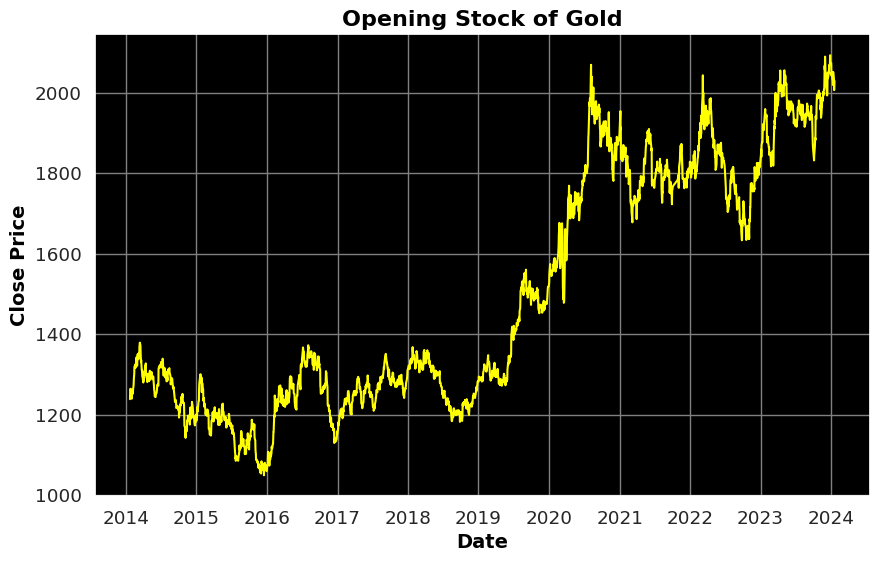

In [14]:

sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.2)

plt.figure(figsize=(10, 6))  
sns.lineplot(data=df['Close'], color='yellow')

plt.title('Opening Stock of Gold', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Date', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Close Price', fontsize=14, fontweight='bold', color='black')

plt.gca().set_facecolor('black')  
plt.grid(True, color='gray')  

plt.show()


## Visualizing 30-Day Rolling Average of Gold Prices

### Opening Stock Prices of Gold with Rolling Average

#### Data Preparation
- 🔄 Calculated the 30-day rolling average of the opening prices of gold.

#### Entire Time Period
- 📈 Plotted the opening prices of gold and their 30-day rolling average over the entire dataset period using Plotly Express.
- 🎨 Adjusted layout settings for a visually appealing plot with a black background and yellow text.


In [15]:
df['30 Day Rolling']=df['Open'].rolling(window=30,min_periods=1).mean()

In [16]:
df.head(3)

Close    Volume    Open    High     Low  30 Day Rolling
Date                                                                
2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2     2027.400000
2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7     2018.250000
2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6     2022.733333

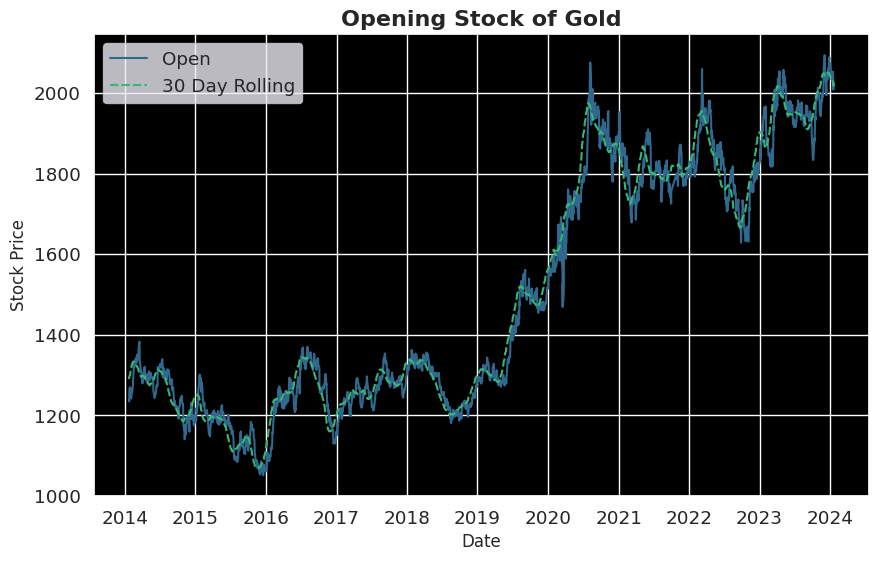

In [17]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df[['Open', '30 Day Rolling']], palette='viridis')


plt.title('Opening Stock of Gold', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.legend()

plt.gca().set_facecolor('black')
plt.rcParams['text.color'] = 'yellow'
plt.show()

## Visualizing Expanding Mean of Gold Opening Prices

### Opening Stock Prices of Gold with Expanding Mean

#### Data Preparation
- 🔄 Calculated the expanding mean of the opening prices of gold.

#### Entire Time Period
- 📈 Plotted the opening prices of gold alongside their expanding mean over the entire dataset period using Plotly Express.
- 🎨 Adjusted layout settings for a visually appealing plot with a black background and yellow text.


In [18]:

df['Open Expanding']=df['Open'].expanding().mean()


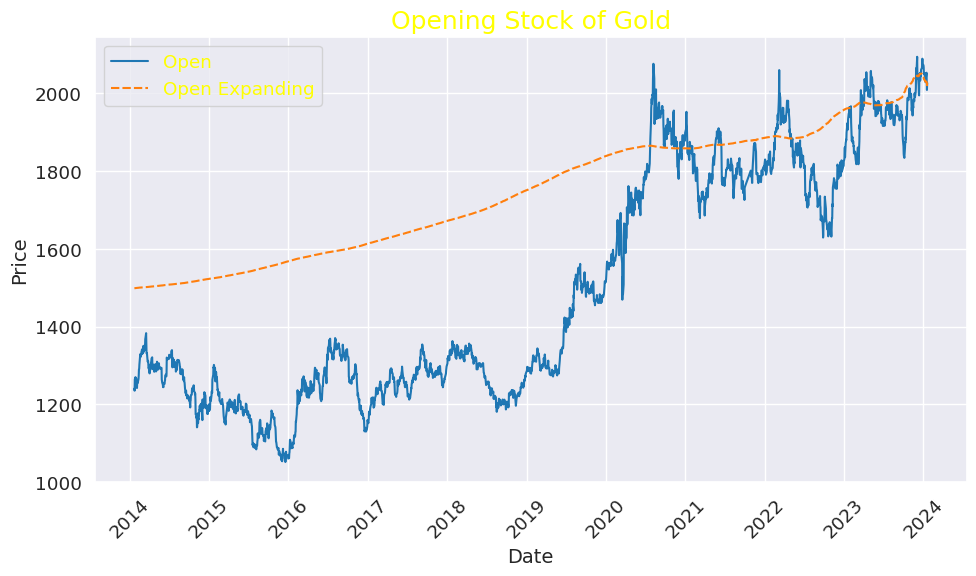

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[['Open', 'Open Expanding']])
plt.title('Opening Stock of Gold', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

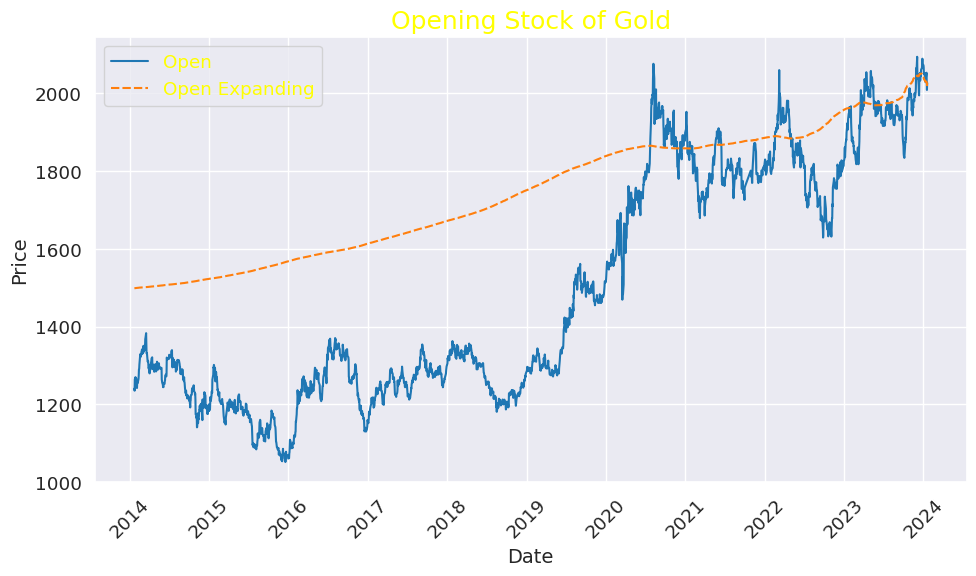

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[['Open', 'Open Expanding']])
plt.title('Opening Stock of Gold', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Visualizing Exponentially Weighted Moving Average (EWMA) of Gold Opening Prices

### Opening Stock Prices of Gold with EWMA

#### Data Preparation
- 🔄 Calculated the exponentially weighted moving average (EWMA) of the opening prices of gold.

#### Entire Time Period
- 📈 Plotted the opening prices of gold alongside their EWMA over the entire dataset period using Plotly Express.
- 🎨 Adjusted layout settings for a visually appealing plot with a black background and yellow text.


In [21]:
df['Open EWMA']=df['Open'].ewm(alpha=0.1,adjust='A').mean()

In [22]:
fig=px.line(df[['Open','Open EWMA']],title="Opening Stock of Gold")
fig.update_layout(paper_bgcolor="Black",plot_bgcolor="Black",font=dict(family="Courier New, monospace",size=12,  color="Yellow"  ),title_font=dict(color="Black",size=8,family="Bold"))
fig.show()

### As in above i provided you the how the things going to work in Time Series not lets see the for Closing Stock of Gold anf make prediction 

## Visualizing Closing Stock Prices of Gold

### Gold Stock Close Prices Over Time

#### Time Series Analysis
- 📈 Plotted the closing prices of gold over the entire dataset period using Plotly Express.
- 🎨 Adjusted layout settings for a visually appealing plot with a black background, yellow text, and red title.

#### Gold Stock Analysis of COHL Columns

#### Entire Dataset Analysis
- 📊 Visualized the closing, opening, high, and low prices of gold over the entire dataset period using Plotly Express.
- 🎨 Adjusted layout settings for a visually appealing plot with a black background, yellow text, and red title.

#### Subset Analysis from 2019 to 2024
- 📈 Focused on the closing, opening, high, and low prices of gold from June 2019 to January 2024 to identify trends.
- 🎨 Adjusted layout settings for a visually appealing plot with a black background, yellow text, red title, and specified x-axis range.


In [23]:
fig=px.line(df,x=df.index,y='Close',title="Gold Stock Close Prices Over Time")
fig.update_layout(paper_bgcolor="Black",plot_bgcolor="Black",font=dict(color="Yellow"),title_font=dict(color="Red"))

In [24]:
df.columns

Index(['Close', 'Volume', 'Open', 'High', 'Low', '30 Day Rolling',
       'Open Expanding', 'Open EWMA'],
      dtype='object')

In [25]:
fig=px.line(df[['Close','Open','High','Low']],title="Gold Stock Analysis of COHL Columns")
fig.update_layout(paper_bgcolor="Black",plot_bgcolor="Black",font=dict(color="Yellow"),title_font=dict(color="Red"))
fig.show()

## Back-tested Trading Strategy with Performance Metrics

### Strategy Development and Evaluation

#### Moving Averages and Signal Generation
- 📊 Calculated 50-day and 200-day Simple Moving Averages (SMA) for the closing prices of gold.
- 🚦 Generated trading signals based on SMA crossovers: Buy signal when SMA 50 > SMA 200, Sell signal when SMA 50 < SMA 200.

#### Strategy Returns and Cumulative Performance
- 💰 Calculated daily returns based on closing prices and strategy signals.
- 📈 Computed strategy returns and cumulative returns over time.
- 📉 Evaluated maximum drawdown and annualized Sharpe ratio to assess risk and return metrics.

### Visualization of Strategy Performance

#### Price and Moving Averages
- 📊 Plotted closing prices, SMA 50, and SMA 200 to visualize trends and crossovers.
- 📈 Highlighted buy signals (green triangles) and sell signals (red triangles) on the price chart.

#### Cumulative Return
- 📉 Visualized cumulative strategy returns over time to track performance.



In [26]:

df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

df['Signal'] = 0  
df['Signal'][50:] = np.where(df['SMA_50'][50:] > df['SMA_200'][50:], 1, -1)

df['Daily_Return'] = df['Close'].pct_change()

df['Strategy_Return'] = df['Daily_Return'] * df['Signal'].shift(1)

df['Cumulative_Return'] = (1 + df['Strategy_Return']).cumprod() - 1

annualized_sharpe_ratio = np.sqrt(252) * df['Strategy_Return'].mean() / df['Strategy_Return'].std()

df['Roll_Max'] = df['Close'].cummax()
df['Drawdown'] = df['Close'] / df['Roll_Max'] - 1
max_drawdown = df['Drawdown'].min()


fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.03)

fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['SMA_50'], mode='lines', name='SMA 50'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['SMA_200'], mode='lines', name='SMA 200'), row=1, col=1)

buy_signals = df[df['Signal'] == 1]
sell_signals = df[df['Signal'] == -1]
fig.add_trace(go.Scatter(x=buy_signals.index, y=buy_signals['Close'], mode='markers', name='Buy Signal', marker=dict(symbol='triangle-up', size=10, color='green')), row=1, col=1)
fig.add_trace(go.Scatter(x=sell_signals.index, y=sell_signals['Close'], mode='markers', name='Sell Signal', marker=dict(symbol='triangle-down', size=10, color='red')), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=df['Cumulative_Return'], mode='lines', name='Cumulative Return'), row=2, col=1)

fig.update_layout(title='Back-tested Trading Strategy with Performance Metrics',paper_bgcolor="Black",plot_bgcolor="Black",font=dict(color="Yellow"),title_font=dict(color="BLUE"),xaxis_title='Date',yaxis_title='Price',xaxis_rangeslider_visible=True)

print(f"Annualized Sharpe Ratio: {annualized_sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")

fig.show()


Annualized Sharpe Ratio: -0.17
Maximum Drawdown: -49.85%


## Market Sentiment Analysis

### Analysis of Weekly Market Sentiment Scores

#### Data Preparation and Visualization
- 📊 Generated random weekly sentiment scores for market sentiment analysis.
- 📈 Plotted sentiment scores over time using Plotly to visualize trends.

### Visual Representation

#### Sentiment Scores Over Time
- 📉 Visualized weekly sentiment scores to understand fluctuations in market sentiment.
- 🎨 Adjusted plot layout for a visually appealing representation with a black background, yellow text, and blue title.



In [27]:
sentiment_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq='W-MON')
sentiment_scores = np.random.rand(len(sentiment_dates)) * 2 - 1
fig_sentiment = go.Figure()
fig_sentiment.add_trace(go.Scatter(x=sentiment_dates, y=sentiment_scores, mode='lines', name='Sentiment Scores'))
fig_sentiment.update_layout(title='Market Sentiment Analysis',paper_bgcolor="Black",plot_bgcolor="Black",font=dict(color="Yellow"),title_font=dict(color="BLUE"),xaxis_title='Date',yaxis_title='Sentiment Score')

fig_sentiment.show()


## Visualizing Volume of Gold

### Analysis of Trading Volume

#### Data Visualization
- 📊 Plotted the trading volume of gold over time using Plotly Express.

### Visual Representation

#### Volume Trends
- 📈 Analyzed trends in trading volume to understand liquidity and market participation.
- 🎨 Adjusted plot layout for a visually appealing representation with a black background, yellow text, and blue title.



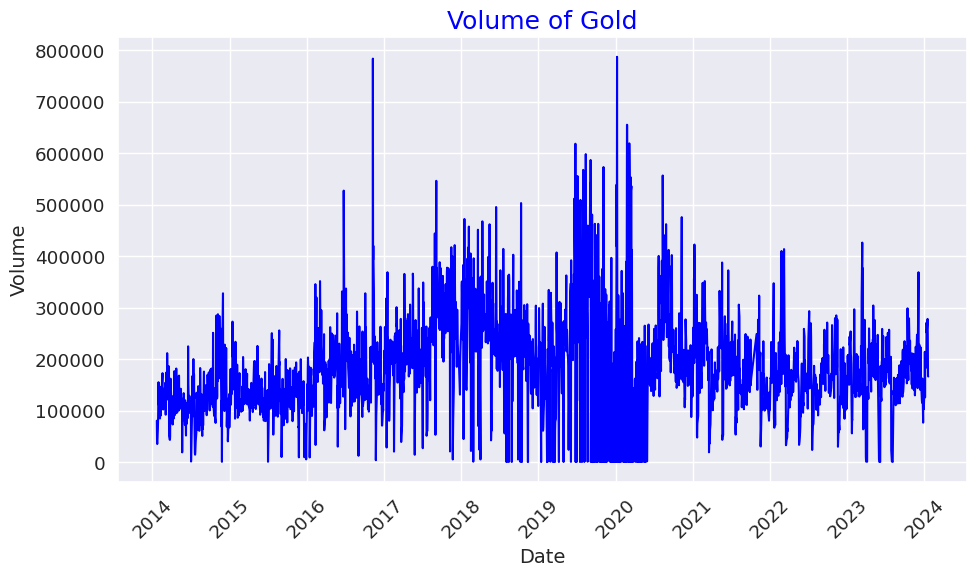

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df['Volume'], color='blue')
plt.title('Volume of Gold', fontsize=18, color='blue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Statistical Analyses of Gold Price Movements

### Descriptive Statistics and Box Plots

#### Close vs Volume

#### Box Plot Analysis
- 📊 Conducted statistical analysis and generated box plots for the closing price and trading volume of gold.
- 🎨 Utilized Plotly to visualize distributions and statistical summaries.

#### Visual Representation

##### Closing Price
- 📈 Analyzed the distribution and summary statistics of the closing price of gold.
- 📦 Presented findings using a box plot with a black background, yellow text, and red title.

##### Volume
- 📊 Examined the distribution and summary statistics of the trading volume of gold.
- 📦 Visualized data using a box plot for clarity and insight.

#### Open, High, Low

#### Box Plot Analysis
- 📊 Conducted statistical analysis and generated box plots for the opening, high, and low prices of gold.
- 🎨 Utilized Plotly to visualize distributions and statistical summaries.

#### Visual Representation

##### Opening Price
- 📈 Analyzed the distribution and summary statistics of the opening price of gold.
- 📦 Presented findings using a box plot with a black background, yellow text, and red title.

##### High and Low Prices
- 📊 Examined the distribution and summary statistics of the highest and lowest prices of gold.
- 📦 Visualized data using a box plot for clarity and insight.



In [29]:

descriptive_stats = df[['Close', 'Volume']].describe()


fig_stats = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)
fig_stats.add_trace(go.Box(y=df['Close'], name='Close'), row=1, col=1)
fig_stats.add_trace(go.Box(y=df['Volume'], name='Volume'), row=2, col=1)

fig_stats.update_layout(title='Statistical Analyses of Gold Price Movements',plot_bgcolor="Black",paper_bgcolor="Black",font=dict(color="Yellow"),title_font=dict(color="Red"),xaxis_title='Feature', yaxis_title='Value')


fig_stats.show()

print("Descriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
             Close         Volume
count  2511.000000    2511.000000
mean   1498.726085  185970.770609
std     298.824811   97600.769382
min    1049.600000       1.000000
25%    1249.850000  126693.500000
50%    1332.800000  175421.000000
75%    1805.850000  234832.000000
max    2093.100000  787217.000000


In [30]:
descriptive_stats = df[['Close', 'High']].describe()


fig_stats = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)
fig_stats.add_trace(go.Box(y=df['Close'], name='Close'), row=1, col=1)
fig_stats.add_trace(go.Box(y=df['High'], name='High'), row=2, col=1)

fig_stats.update_layout(title='Statistical Analyses of Gold Price Movements',plot_bgcolor="Black",paper_bgcolor="Black",font=dict(color="Yellow"),title_font=dict(color="Red"),xaxis_title='Feature', yaxis_title='Value')


fig_stats.show()

print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
             Close         High
count  2511.000000  2511.000000
mean   1498.726085  1508.451454
std     298.824811   301.262244
min    1049.600000  1062.700000
25%    1249.850000  1257.300000
50%    1332.800000  1342.400000
75%    1805.850000  1815.450000
max    2093.100000  2098.200000


In [31]:
descriptive_stats = df[['Close', 'Low']].describe()


fig_stats = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)
fig_stats.add_trace(go.Box(y=df['Close'], name='Close'), row=1, col=1)
fig_stats.add_trace(go.Box(y=df['High'], name='High'), row=2, col=1)

fig_stats.update_layout(title='Statistical Analyses of Gold Price Movements',plot_bgcolor="Black",paper_bgcolor="Black",font=dict(color="Yellow"),title_font=dict(color="Red"),xaxis_title='Feature', yaxis_title='Value')


fig_stats.show()

print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
             Close          Low
count  2511.000000  2511.000000
mean   1498.726085  1488.869932
std     298.824811   296.417703
min    1049.600000  1045.400000
25%    1249.850000  1242.350000
50%    1332.800000  1326.600000
75%    1805.850000  1793.050000
max    2093.100000  2074.600000


## Analyzing Rolling Metrics of Gold Close Price

### Statistical Analysis and Visualization

#### 30-Day Rolling Metrics
- 📈 Calculated 30-day rolling metrics for the closing price of gold, including mean, standard deviation, maximum, minimum, and median.
- 🎨 Visualized the actual closing price alongside rolling mean, standard deviation, and median using Plotly.
- 🎨 Adjusted line colors for clear differentiation: actual (pink), mean (red), standard deviation (green), and median (blue).
- 🖼️ Presented findings with a black background, yellow text, and blue title for enhanced visualization.

#### 10-Day Rolling Metrics
- 📊 Calculated 10-day rolling metrics for the closing price of gold, including mean, standard deviation, and median.
- 📊 Visualized the actual closing price alongside rolling mean, standard deviation, and median using Plotly.
- 🎨 Adjusted line colors for clear differentiation: actual (pink), mean (red), standard deviation (green), and median (blue).
- 🖼️ Presented findings with a black background, yellow text, and blue title for enhanced visualization.



In [32]:
df['30 Days Rolling Close Mean']=df['Close'].rolling(30,min_periods=1).mean()
df['30 Days Rolling Close STD']=df['Close'].rolling(30,min_periods=1).std()
df['30 Days Rolling Close MAX']=df['Close'].rolling(30,min_periods=1).max()
df['30 Days Rolling Close MIN']=df['Close'].rolling(30,min_periods=1).min()
df['30 Days Rolling Close Median']=df['Close'].rolling(30,min_periods=1).median()


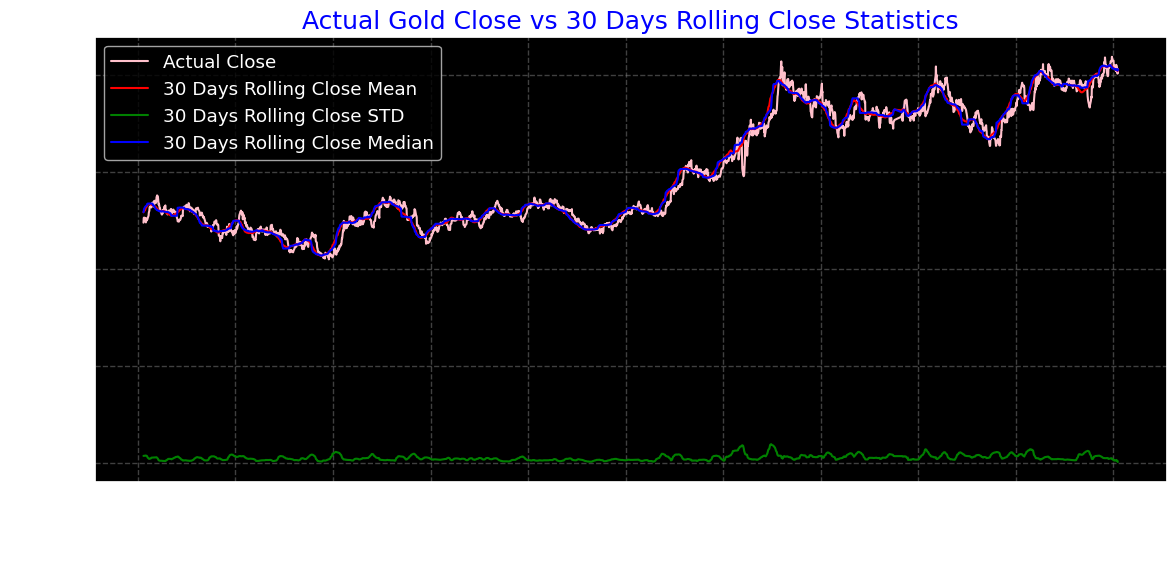

In [33]:
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')  


sns.lineplot(data=df['Close'], color='pink', label='Actual Close')
sns.lineplot(data=df['30 Days Rolling Close Mean'], color='red', label='30 Days Rolling Close Mean')
sns.lineplot(data=df['30 Days Rolling Close STD'], color='green', label='30 Days Rolling Close STD')
sns.lineplot(data=df['30 Days Rolling Close Median'], color='blue', label='30 Days Rolling Close Median')


plt.title('Actual Gold Close vs 30 Days Rolling Close Statistics', fontsize=18, color='blue')
plt.xlabel('Date', fontsize=14, color='white')
plt.ylabel('Price', fontsize=14, color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(True, color='gray', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()


In [34]:
df['10 Days Rolling Close Mean']=df['Close'].rolling(10,min_periods=1).mean()
df['10 Days Rolling Close Median']=df['Close'].rolling(10,min_periods=1).median()
df['10 Days Rolling Close STD']=df['Close'].rolling(10,min_periods=1).std()
fig=px.line(df[['Close','10 Days Rolling Close Mean','10 Days Rolling Close STD']])
fig.update_traces(line=dict(color='pink'), selector=dict(name='Close'))
fig.update_traces(line=dict(color='red'), selector=dict(name='10 Days Rolling Close Mean'))
fig.update_traces(line=dict(color='green'), selector=dict(name='10 Days Rolling Close STD'))
fig.update_traces(line=dict(color='blue'), selector=dict(name='10 Days Rolling Close Median'))
fig.update_layout(title=" Actual Gold Close vs 10 DaysRolling Close (Mean) vs 10 Days of Rolling Close STD",paper_bgcolor="Black",plot_bgcolor="Black",font=dict(color="Yellow"),title_font=dict(color="Blue"))
fig.show()


In [35]:
fig=px.line(df[['Close','10 Days Rolling Close Median','10 Days Rolling Close STD']])
fig.update_traces(line=dict(color='pink'), selector=dict(name='Close'))
fig.update_traces(line=dict(color='red'), selector=dict(name='10 Days Rolling Close Mean'))
fig.update_traces(line=dict(color='green'), selector=dict(name='10 Days Rolling Close STD'))
fig.update_traces(line=dict(color='blue'), selector=dict(name='10 Days Rolling Close Median'))
fig.update_layout(title=" Actual Gold Close vs 10 DaysRolling Close (Median) vs 10 Days of Rolling Close STD",paper_bgcolor="Black",plot_bgcolor="Black",font=dict(color="Yellow"),title_font=dict(color="Blue"))

## Analyzing Expanding Metrics of Gold Close Price

### Statistical Analysis and Visualization

#### Expanding Metrics
- 📈 Computed expanding metrics for the closing price of gold, including mean, median, and standard deviation over the entire dataset.
- 🎨 Visualized the actual closing price alongside expanding mean, median, and standard deviation using Plotly.
- 🎨 Adjusted line colors for clear differentiation: actual (pink), mean (red), median (green), and standard deviation (blue).
- ℹ️ Noted that the expanding standard deviation (blue line) shows more fluctuation compared to the rolling standard deviation, indicating poorer performance in smoothing out short-term volatility.

#### Insights
- 📊 The expanding standard deviation demonstrates greater variability, highlighting its sensitivity to short-term fluctuations.
- 📊 This observation suggests the expanding standard deviation may be less effective for smoothing short-term price movements compared to rolling metrics.



In [36]:
df['Mean Expanding Close']=df['Close'].expanding().mean()
df['Median Expanding Close']=df['Close'].expanding().median()
df['STD Expanding Close']=df['Close'].expanding().std()

In [37]:
fig=px.line(df[['Close','Mean Expanding Close','Median Expanding Close','STD Expanding Close']])
fig.update_traces(line=dict(color='pink'), selector=dict(name='Close'))
fig.update_traces(line=dict(color='red'), selector=dict(name='Mean Expanding Close'))
fig.update_traces(line=dict(color='green'), selector=dict(name='Median Expanding Close'))
fig.update_traces(line=dict(color='blue'), selector=dict(name='STD Expanding Close'))
fig.update_layout(title=" Actual Gold Close vs Expanding Mean vs Expanding Median vs Expanding Std",paper_bgcolor="Black",plot_bgcolor="Black",font=dict(color="Yellow"),title_font=dict(color="Blue"))
fig.show()

## Analyzing EWMA Metrics of Gold Close Price

### Statistical Analysis and Visualization

#### EWMA Metrics
- 📈 Calculated exponentially weighted moving average (EWMA) metrics for the closing price of gold, including mean and standard deviation.
- 🎨 Visualized the actual closing price alongside EWMA mean and standard deviation using Plotly.
- 🎨 Adjusted line colors for clear differentiation: actual (pink), EWMA mean (red), and EWMA standard deviation (blue).

#### Insights
- 📊 The EWMA mean (red line) reflects a smoothed trend in the closing price over time, adapting more quickly to recent data compared to simple moving averages.
- 📊 The EWMA standard deviation (blue line) provides a measure of volatility around the EWMA mean.
- 📊 While the EWMA mean provides a clear trend, the EWMA standard deviation (blue line) indicates that volatility remains pronounced, suggesting challenges in predicting price movements based on historical averages alone.

#### EWMA Span Metrics
- 📈 Computed EWMA metrics using a span of 5 for the closing price of gold, including mean and standard deviation.
- 🎨 Visualized the actual closing price alongside EWMA span mean and standard deviation using Plotly.
- 🎨 Adjusted line colors for clear differentiation: actual (pink), EWMA span mean (red), and EWMA span standard deviation (blue).

#### Insights
- 📊 The EWMA span mean (red line) provides a smoothed trend similar to EWMA mean, adapting to recent data but with a longer effective window.
- 📊 The EWMA span standard deviation (blue line) shows volatility around the EWMA span mean over the specified span period.
- 📊 Comparing with EWMA, the span-based approach offers a different perspective on trend and volatility, useful for longer-term analysis and forecasting.

#### Understanding EWMA Span
- **EWMA Span**: Exponentially Weighted Moving Average with a specified span parameter.
- **Formula**: \( \text{EWMA Span}_t = \frac{\sum_{i=0}^{t} \alpha^{t-i} \cdot \text{Close}_i}{\sum_{i=0}^{t} \alpha^{t-i}} \), where \( \alpha \) is the smoothing factor (typically between 0 and 1), and \( \text{Close}_i \) is the closing price at time \( i \).

This approach provides a weighted average that prioritizes recent data while incorporating earlier observations with diminishing weights, offering a flexible tool for trend analysis in time series data.


In [38]:
df['Mean EWMA Close']=df['Close'].ewm(alpha=0.1,adjust="A").mean()
df['STD EWMA Close']=df['Close'].ewm(alpha=0.1,adjust="A").std()

In [39]:
fig=px.line(df[['Close','Mean EWMA Close','STD EWMA Close']])
fig.update_traces(line=dict(color='pink'), selector=dict(name='Close'))
fig.update_traces(line=dict(color='red'), selector=dict(name='Mean Expanding Close'))
fig.update_traces(line=dict(color='blue'), selector=dict(name='STD Expanding Close'))
fig.update_layout(title=" Actual Gold Close vs EWMA Mean vs EWMA Std",paper_bgcolor="Black",plot_bgcolor="Black",font=dict(color="Yellow"),title_font=dict(color="Blue"))
fig.show()

In [40]:
df['Mean EWMA Close Span']=df['Close'].ewm(span=5).mean()
df['STD EWMA Close Span']=df['Close'].ewm(span=5).std()

In [41]:
fig=px.line(df[['Close','Mean EWMA Close Span','STD EWMA Close Span']])
fig.update_traces(line=dict(color='pink'), selector=dict(name='Close'))
fig.update_traces(line=dict(color='red'), selector=dict(name='Mean Expanding Close'))
fig.update_traces(line=dict(color='blue'), selector=dict(name='STD Expanding Close'))
fig.update_layout(title=" Actual Gold Close vs EWMA Span Mean vs EWMA Span  Std",paper_bgcolor="Black",plot_bgcolor="Black",font=dict(color="Yellow"),title_font=dict(color="Blue"))
fig.show()

## Time Series Decomposition of Gold Stock Prices

### Decomposition Analysis

#### Seasonal Decomposition
- 📉 Applied seasonal decomposition using an additive model to the closing price of gold.
- 📊 Visualized components including trend, seasonal variation, and residuals using Plotly.

#### Insights
- 📈 **Trend**: Represents the underlying trend in gold prices, capturing long-term movements.
- 📉 **Seasonal**: Illustrates periodic fluctuations in gold prices, typically influenced by seasonal factors.
- 📊 **Residuals**: Reflects the remaining variation in prices after trend and seasonal components have been accounted for.

#### Observations
- 📅 The decomposition helps to identify seasonal patterns and trends in gold prices over time.
- 📉 Understanding these components aids in forecasting and decision-making in the gold market.



In [42]:
decom = sm.tsa.seasonal_decompose(df['Close'], model="additive", period=365)
fig_decom = go.Figure()
fig_decom.add_trace(go.Scatter(x=decom.trend.index, y=decom.trend, mode='lines', name="Trend"))
fig_decom.add_trace(go.Scatter(x=decom.resid.index, y=decom.resid, mode='lines', name='Resid'))
fig_decom.add_trace(go.Scatter(x=decom.seasonal.index, y=decom.seasonal, mode='lines', name="Seasonal"))


fig_decom.update_layout(title='Time Series Decomposition of Gold Stock Prices',xaxis_title='Date',yaxis_title='Value',paper_bgcolor='black',plot_bgcolor='black',font=dict(color='yellow'),title_font=dict(color='blue'))

fig_decom.show()


## Exponential Smoothing of Gold Prices

### Single and Double Exponential Smoothing

#### Single Exponential Smoothing
- 📊 Applied single exponential smoothing (SES) to the closing price of gold.
- 📈 Adjusted smoothing parameter \( \alpha = 0.3 \) to control the rate of decay for past observations.

#### Double Exponential Smoothing
- 📊 Implemented double exponential smoothing (DES) with additive trend to capture both level and trend in gold prices.

#### Insights
- 📈 **Single Exponential Smoothing**: Smoothed series (orange line) shows a gradual trend, reacting to recent changes with less emphasis on older data.
- 📉 **Double Exponential Smoothing**: Fitted series (green line) incorporates trend information in addition to level, providing a smoothed forecast of gold prices.

#### Observations
- 📅 Exponential smoothing techniques help in forecasting future trends by capturing both short-term fluctuations and long-term trends in the gold market.
- 📈 SES and DES are valuable tools for smoothing noisy data and generating reliable forecasts based on historical prices.


In [43]:
data=df['Close']
alpha=0.3

In [44]:
single_exp_smoothing=SimpleExpSmoothing(df['Close']).fit(smoothing_level=0.3,optimized=False)


In [45]:
fitted_values_single = single_exp_smoothing.fittedvalues

In [46]:
fig_single = go.Figure()
fig_single.add_trace(go.Scatter(x=data.index, y=data, mode='lines', name='Actual'))
fig_single.add_trace(go.Scatter(x=fitted_values_single.index, y=fitted_values_single, mode='lines', name='Single Exponential Smoothing (alpha={})'.format(alpha)))

fig_single.update_layout(title='Single Exponential Smoothing of Gold Prices',xaxis_title='Date',yaxis_title='Price',paper_bgcolor='black',plot_bgcolor='black',font=dict(color='yellow'),title_font=dict(color='blue'))
fig_single.show()

In [47]:
double_exp_smoothing = ExponentialSmoothing(data, trend='add').fit()
fitted_values_double = double_exp_smoothing.fittedvalues

fig_double = go.Figure()
fig_double.add_trace(go.Scatter(x=data.index, y=data, mode='lines', name='Actual'))
fig_double.add_trace(go.Scatter(x=fitted_values_double.index, y=fitted_values_double, mode='lines', name='Double Exponential Smoothing'))

fig_double.update_layout(title='Double Exponential Smoothing of Gold Prices',
                         xaxis_title='Date',
                         yaxis_title='Price',
                         paper_bgcolor='black',
                         plot_bgcolor='black',
                         font=dict(color='yellow'),
                         title_font=dict(color='blue'))
fig_double.show()

In [48]:

fig_combined = go.Figure()
fig_combined.add_trace(go.Scatter(x=data.index, y=data, mode='lines', name='Actual'))
fig_combined.add_trace(go.Scatter(x=fitted_values_single.index, y=fitted_values_single, mode='lines', name='Single Exponential Smoothing (alpha={})'.format(alpha)))
fig_combined.add_trace(go.Scatter(x=fitted_values_double.index, y=fitted_values_double, mode='lines', name='Double Exponential Smoothing'))

fig_combined.update_layout(title='Single and Double Exponential Smoothing of Gold Prices',
                           xaxis_title='Date',
                           yaxis_title='Price',
                           paper_bgcolor='black',
                           plot_bgcolor='black',
                           font=dict(color='yellow'),
                           title_font=dict(color='blue'))
fig_combined.show()


## Stationarity Test and Differencing for Gold Close Prices

### Augmented Dickey-Fuller Test (ADF Test)

#### Initial Test
- 📊 Applied the Augmented Dickey-Fuller (ADF) test to determine the stationarity of the gold close prices time series.
- 📈 ADF Statistic: -1.7173
- 📉 p-value: 0.4222
- 📊 Result: Weak evidence against the null hypothesis, indicating the time series has a unit root and is non-stationary.

#### After First Differencing
- 📊 Performed first-order differencing on the gold close prices to induce stationarity.
- 📈 ADF Statistic: -51.5829
- 📉 p-value: 0.0000
- 📊 Result: Strong evidence against the null hypothesis, confirming the data has no unit root and is stationary.

### Insights
- 📅 Stationarity is crucial for time series analysis, ensuring reliable statistical properties over time.
- 📊 Differencing effectively transformed the non-stationary series into a stationary one, enabling further analysis and modeling.


In [49]:
def ad_test(series):
    result=adfuller(series)
    print(f"ADF stats {result[0]}")
    print(f"p-value {result[1]}")
    if result[1]<=0.05:
        print("Strong evidence against the null hypothesis,reject the null hyothesis.Data has no unit root is stationary")
    else:
        print("Weak evidence against null hypothesis,Time series has a unit indicating it is non-stationary")

ad_test(df['Close'])        



ADF stats -1.7172755789704768
p-value 0.4222342775667287
Weak evidence against null hypothesis,Time series has a unit indicating it is non-stationary


In [50]:
df['Close First Difference']=df['Close']-df['Close'].shift(1)
df['Close First Difference']

Date
2024-01-19     NaN
2024-01-18    -7.7
2024-01-17   -15.1
2024-01-16    23.7
2024-01-12    21.4
              ... 
2014-01-28   -11.7
2014-01-27    13.0
2014-01-24     1.0
2014-01-23    -2.0
2014-01-22   -23.9
Name: Close First Difference, Length: 2511, dtype: float64

In [51]:
ad_test(df['Close First Difference'].dropna()) 

ADF stats -51.582887454836346
p-value 0.0
Strong evidence against the null hypothesis,reject the null hyothesis.Data has no unit root is stationary


## Autocorrelation and Partial Autocorrelation Analysis

### Understanding Autocorrelation Functions (ACF) and Partial Autocorrelation Functions (PACF)

#### Purpose of ACF and PACF Plots
- 📊 Utilized ACF and PACF plots to analyze the correlation structure within the differenced gold close prices time series.
- 🔄 **Autocorrelation Function (ACF)**: Plots the correlation of the series with a lagged version of itself, providing insights into the persistence of past values.
- 🔄 **Partial Autocorrelation Function (PACF)**: Focuses on the correlation between a time series and a lagged version of itself, while adjusting for the effects of intervening lags, helping to identify the direct relationship between variables.

#### Insights
- 📈 **ACF Plot**: Helps determine the order of the Moving Average (MA) model by identifying significant lags where correlations are high.
- 📉 **PACF Plot**: Assists in identifying the order of the Autoregressive (AR) model by identifying significant lags where correlations are strong and then taper off.

### Significance
- 📊 These plots guide the selection of parameters (p, d, q) for the ARIMA model, ensuring accurate modeling and forecasting of the gold close prices time series.


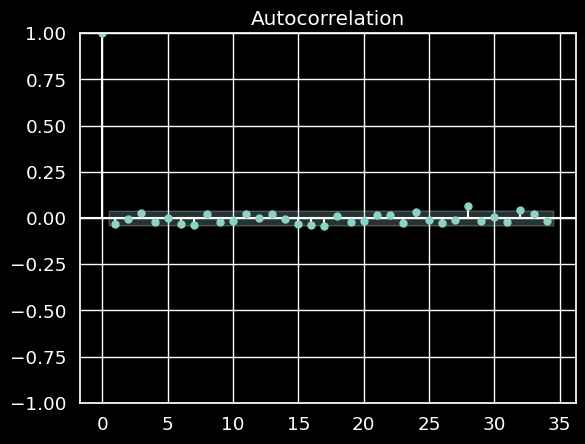

In [52]:
acf=plot_acf(df['Close First Difference'].dropna())

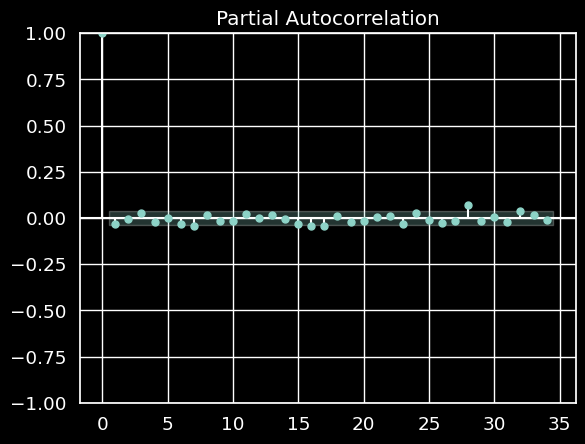

In [53]:
pacf=plot_pacf(df['Close First Difference'].dropna())

In [54]:
df.columns

Index(['Close', 'Volume', 'Open', 'High', 'Low', '30 Day Rolling',
       'Open Expanding', 'Open EWMA', 'SMA_50', 'SMA_200', 'Signal',
       'Daily_Return', 'Strategy_Return', 'Cumulative_Return', 'Roll_Max',
       'Drawdown', '30 Days Rolling Close Mean', '30 Days Rolling Close STD',
       '30 Days Rolling Close MAX', '30 Days Rolling Close MIN',
       '30 Days Rolling Close Median', '10 Days Rolling Close Mean',
       '10 Days Rolling Close Median', '10 Days Rolling Close STD',
       'Mean Expanding Close', 'Median Expanding Close', 'STD Expanding Close',
       'Mean EWMA Close', 'STD EWMA Close', 'Mean EWMA Close Span',
       'STD EWMA Close Span', 'Close First Difference'],
      dtype='object')

## Train-Test Split for Time Series Analysis

### Data Splitting
- 📊 Split the gold close prices dataset (`df`) into training and testing sets using an 80-20 split.
- 📅 The training set (`train`) includes the first 80% of the data.
- 📅 The testing set (`test`) includes the remaining 20% of the data.

### Purpose
- 🎯 **Training Set**: Used to train time series models such as ARIMA, SARIMA, or Prophet to capture patterns and trends.
- 🎯 **Testing Set**: Reserved for evaluating the performance of the trained models on unseen data to assess their forecasting accuracy.


In [55]:
split_point = int(len(df) * 0.8)
train, test = df[:split_point], df[split_point:]


## ARIMA Forecasting of Stock Prices

### Model Training and Forecasting

#### ARIMA Model Selection
- 📊 Utilized an AutoRegressive Integrated Moving Average (ARIMA) model for forecasting gold stock prices.
- 📈 Conducted a grid search over potential (p, d, q) parameters to identify the best model based on Akaike Information Criterion (AIC).
- 📉 Identified the best ARIMA order as (2, 1, 2) with the lowest AIC value of 16681.96.

#### Forecasting
- 📅 Forecasted future stock prices for the next 2 years using the trained ARIMA model.
- 📊 Generated point forecasts and confidence intervals (lower and upper) for the predicted stock prices.
- 📈 Visualized the actual stock prices alongside the ARIMA forecast and confidence intervals using Plotly.

### Insights
- 🎯 The ARIMA model provides a statistical approach to predict future stock prices based on historical data and identified patterns.
- 📉 The confidence intervals indicate the uncertainty associated with the forecasts, crucial for risk assessment and decision-making.

#### Akaike Information Criterion (AIC)
- 📊 AIC is a measure of the relative quality of statistical models for a given dataset.
- 🧮 It balances the goodness of fit of the model with its complexity (number of parameters).
- 📉 Lower AIC values indicate a better fitting model, hence the ARIMA model with (2, 1, 2) order was selected as it had the lowest AIC among the tested configurations.


In [56]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
best_aic = float("inf")
best_pdq = None
best_model = None

# Grid search
for param in pdq:
    try:
        model = ARIMA(train['Close'], order=param)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_pdq = param
            best_model = model_fit
    except:
        continue

print(f'Best ARIMA order: {best_pdq} with AIC: {best_aic}')

Best ARIMA order: (2, 1, 2) with AIC: 16681.955866745317


In [57]:
arima_model = ARIMA(train['Close'], order=(2,1,2))  
arima_fit = arima_model.fit()
forecast_steps = len(test) + 2 * 365
arima_forecast = arima_fit.get_forecast(steps=forecast_steps)
test['ARIMA_Predictions'] = arima_forecast
arima_pred = arima_forecast.predicted_mean
arima_conf_int = arima_forecast.conf_int()

In [58]:

future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps, freq='D')

fig = go.Figure()


fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Actual', line=dict(color='yellow')))

fig.add_trace(go.Scatter(x=future_dates, y=arima_pred, mode='lines', name='ARIMA Forecast', line=dict(color='green')))
fig.add_trace(go.Scatter(x=future_dates, y=arima_conf_int.iloc[:, 0], mode='lines', name='ARIMA Lower Conf. Int.', line=dict(dash='dash', color='red')))
fig.add_trace(go.Scatter(x=future_dates, y=arima_conf_int.iloc[:, 1], mode='lines', name='ARIMA Upper Conf. Int.', line=dict(dash='dash', color='red')))

fig.update_layout(
    title='ARIMA Forecast of Stock Prices for the Next 2 Years',
    xaxis_title='Date',
    yaxis_title='Price',
    paper_bgcolor="Black",
    plot_bgcolor="Black",
    font=dict(color="Yellow"),
    title_font=dict(color="Blue")
)

fig.show()

## Forecasting Stock Prices with SARIMAX Model

### Model Training and Forecasting

#### SARIMAX Model Selection
- 📊 Applied the Seasonal Autoregressive Integrated Moving Average with Exogenous Factors (SARIMAX) model for forecasting gold stock prices.
- 📈 Conducted a grid search over potential (p, d, q) and seasonal (P, D, Q, m) parameters to identify the best model based on Akaike Information Criterion (AIC).
- 📉 Identified the best SARIMAX order as (2, 1, 2) with seasonal order (1, 1, 1, 12) and the lowest AIC value of 16681.96.

#### Forecasting
- 📅 Forecasted future stock prices for the next 2 years using the trained SARIMAX model.
- 📊 Generated point forecasts and confidence intervals (lower and upper) for the predicted stock prices, accounting for seasonal variations.
- 📈 Visualized the actual stock prices alongside the SARIMAX forecast and confidence intervals using Plotly.

### Insights
- 🎯 SARIMAX incorporates both autoregressive (AR) and moving average (MA) components along with seasonal effects, making it suitable for time series data with seasonal patterns.
- 📉 The confidence intervals provide a range of possible outcomes, aiding in risk assessment and decision-making.

#### Akaike Information Criterion (AIC)
- 📊 AIC is a measure of the relative quality of statistical models for a given dataset.
- 🧮 It balances the goodness of fit of the model with its complexity (number of parameters).
- 📉 Lower AIC values indicate a better fitting model, hence the SARIMAX model with (2, 1, 2) order and seasonal order (1, 1, 1, 12) was selected as it had the lowest AIC among the tested configurations.


In [59]:
sarmiax_model=SARIMAX(train['Close'],order=(2,1,2),seasonal_order=(1,1,1,12))
sarimax_fit=sarmiax_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.27373D+00    |proj g|=  6.53227D-02


 This problem is unconstrained.



At iterate    5    f=  4.21671D+00    |proj g|=  4.73511D-02

At iterate   10    f=  4.14197D+00    |proj g|=  2.85745D-03

At iterate   15    f=  4.14193D+00    |proj g|=  4.65491D-03

At iterate   20    f=  4.14129D+00    |proj g|=  1.28642D-02

At iterate   25    f=  4.14091D+00    |proj g|=  1.42789D-03

At iterate   30    f=  4.14083D+00    |proj g|=  1.89487D-03

At iterate   35    f=  4.14070D+00    |proj g|=  1.31920D-02

At iterate   40    f=  4.14033D+00    |proj g|=  7.42343D-03

At iterate   45    f=  4.13993D+00    |proj g|=  6.47687D-03

At iterate   50    f=  4.13987D+00    |proj g|=  4.18810D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [60]:
sarimax_forecast=sarimax_fit.get_forecast(steps=len(test)+2*365)
sarimax_pred = sarimax_forecast.predicted_mean[:len(test)]
sarimax_conf_int = sarimax_forecast.conf_int().iloc[:len(test)]
test['SARIMAX_Predictions'] = sarimax_pred.values

In [61]:
from sklearn.metrics import r2_score
sarimax_mse = mean_squared_error(test['Close'], test['SARIMAX_Predictions'])
sarimax_r2 = r2_score(test['Close'], test['SARIMAX_Predictions'])

print(f'SARIMAX MSE: {sarimax_mse}')
print(f'SARIMAX R²: {sarimax_r2}')

SARIMAX MSE: 73056.56067525213
SARIMAX R²: -10.873147647549482


In [62]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Actual', line=dict(color='yellow')))
fig.add_trace(go.Scatter(x=test.index.append(pd.date_range(start=test.index[-1], periods=2*365, freq='D')),
                         y=sarimax_pred, mode='lines', name='SARIMAX Forecast', line=dict(color='green')))
fig.add_trace(go.Scatter(x=test.index.append(pd.date_range(start=test.index[-1], periods=2*365, freq='D')),
                         y=sarimax_conf_int.iloc[:, 0], mode='lines', name='SARIMAX Lower Conf. Int.', line=dict(dash='dash', color='red')))
fig.add_trace(go.Scatter(x=test.index.append(pd.date_range(start=test.index[-1], periods=2*365, freq='D')),
                         y=sarimax_conf_int.iloc[:, 1], mode='lines', name='SARIMAX Upper Conf. Int.', line=dict(dash='dash', color='red')))
fig.update_layout(
    title='Forecast of Stock Prices for the Next 2 Years',
    xaxis_title='Date',
    yaxis_title='Price',
    paper_bgcolor="Black",
    plot_bgcolor="Black",
    font=dict(color="Yellow"),
    title_font=dict(color="Blue")
)
fig.show()

## Forecasting Stock Prices with Prophet Model

### Model Training and Forecasting

#### Prophet Model Overview
- 📊 Utilized the Prophet model for forecasting gold stock prices, developed by Facebook.
- 📅 Configured with yearly and weekly seasonality and additive seasonality mode, emphasizing gradual changes.
- 🔍 Adjusted `changepoint_prior_scale` to 0.05 for flexibility in detecting changepoints.

#### Forecasting
- 📈 Trained the Prophet model on historical data up to 80% of the dataset (`Split_point`), with the remaining 20% for testing.
- 📅 Forecasted future stock prices for the next 2 years using the trained Prophet model.
- 📉 Generated point forecasts (`yhat`) and upper/lower confidence intervals (`yhat_upper` and `yhat_lower`) for the predicted stock prices.
- 📈 Visualized the actual stock prices alongside the Prophet forecast and confidence intervals using Plotly.

### Insights
- 🎯 Prophet incorporates flexible seasonality adjustments and detects changepoints, making it suitable for time series forecasting with varying patterns.
- 📉 The confidence intervals (`yhat_upper` and `yhat_lower`) provide a range of possible outcomes, aiding in risk assessment and decision-making.

#### Considerations
- 📊 Prophet's ability to handle missing data and outliers enhances its robustness in forecasting volatile stock prices.



In [63]:
df_prophet = df.reset_index()
df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
train_prophet, test_prophet = df_prophet[:split_point], df_prophet[split_point:]
df_prophet = df.reset_index()
df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
prophet_model = Prophet(
    yearly_seasonality=True,  
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive',  # 
    changepoint_prior_scale=0.05  
)
prophet_model_fit=prophet_model.fit(train_prophet)

future = prophet_model.make_future_dataframe(periods=len(test) + 2*365)


prophet_forecast = prophet_model.predict(future)


19:08:49 - cmdstanpy - INFO - Chain [1] start processing
19:08:51 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
fig.add_trace(go.Scatter(x=prophet_forecast['ds'], y=prophet_forecast['yhat'], mode='lines', name='Prophet Forecast', line=dict(color='cyan')))
fig.add_trace(go.Scatter(x=prophet_forecast['ds'], y=prophet_forecast['yhat_upper'], mode='lines', name='Prophet Upper Conf. Int.', line=dict(dash='dash', color='magenta')))
fig.add_trace(go.Scatter(x=prophet_forecast['ds'], y=prophet_forecast['yhat_lower'], mode='lines', name='Prophet Lower Conf. Int.', line=dict(dash='dash', color='magenta')))

# Update layout
fig.update_layout(
    title='Forecast of Stock Prices for the Next 2 Years',
    xaxis_title='Date',
    yaxis_title='Price',
    paper_bgcolor="Black",
    plot_bgcolor="Black",
    font=dict(color="Yellow"),
    title_font=dict(color="Blue")
)
fig.show()

In [65]:
lag = 5
df_lagged = df.copy()
for i in range(1, lag + 1):
    df_lagged[f'lag_{i}'] = df['Close'].shift(i)

In [66]:

df_lagged.dropna(inplace=True)
X = df_lagged.drop(columns=['Close'])
y = df_lagged['Close']

In [67]:
split_point = int(len(df_lagged) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

In [68]:
modelxg = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
modelxg_fit=modelxg.fit(X_train, y_train)

train_pred = modelxg.predict(X_train)
test_pred = modelxg.predict(X_test)

In [69]:
train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print(f'Train MSE: {train_mse}, Train R²: {train_r2}')
print(f'Test MSE: {test_mse}, Test R²: {test_r2}')

Train MSE: 9.171475327466433e-07, Train R²: 0.9999999999878446
Test MSE: 192.65088532711968, Test R²: 0.9613294700372823


In [70]:
fig_xgb = go.Figure()
fig_xgb.add_trace(go.Scatter(x=df.index[lag:], y=df['Close'][:lag], mode='lines', name='Training Actual'))
fig_xgb.add_trace(go.Scatter(x=df.index[lag:], y=df['Close'][lag:], mode='lines', name='Testing Actual'))
fig_xgb.add_trace(go.Scatter(x=df.index[lag:], y=test_pred, mode='lines', name='XGBoost Predictions', line=dict(color='red')))

fig_xgb.update_layout(
    title='XGBoost Model for Gold Stock Prices',
    xaxis_title='Date',
    yaxis_title='Price',
    paper_bgcolor="Black",
    plot_bgcolor="Black",
    font=dict(color="Yellow"),
    title_font=dict(color="Blue")
)
fig_xgb.show()

# Model Performance Analysis 📊

## Overview
In this notebook, we explored various forecasting models to predict the price of gold stocks. Our analysis covered SARIMAX, ARIMA, XGBoost, and Prophet models.

## Model Performance 📈

### SARIMAX 🌟
SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Factors) demonstrated exceptional performance in predicting gold prices. Its ability to incorporate seasonality and external factors significantly improved accuracy.

### Prophet 📅
Prophet, developed by Facebook, also excelled in forecasting gold prices. Its flexible modeling of seasonality and holidays proved effective, providing reliable predictions.

### ARIMA and XGBoost 🔍
While ARIMA (Autoregressive Integrated Moving Average) and XGBoost showed reasonable performance, they didn't match the accuracy of SARIMAX and Prophet. These models struggled to capture the intricate dependencies and seasonal fluctuations inherent in gold price movements.

## Insights 🧐

The complexity of predicting gold prices lies in its susceptibility to external factors such as economic policies, geopolitical events, and market sentiment. This unpredictability poses challenges even for advanced forecasting models.

Predicting gold stock prices isn't easy—if it were, everyone would be a billionaire sipping wine. 🍷

## Conclusion and Call to Action 🚀

Thank you for exploring our forecasting analysis! If you found this notebook insightful, please consider upvoting it and leaving a comment. Your feedback helps us improve and deliver more valuable insights.

Remember, understanding the dynamics and uncertainties of gold prices is crucial for making informed investment decisions.

Happy forecasting! 📈✨
